# Average Day Crime Stats

Om een vergelijking te maken tussen de feesdagen en een gemiddelde dag. Moeten we eerst inzicht hebben in elke vraag over de gehele dataset. Daar is deze notebook voor.

De vragen die beantwoord moeten worden zijn:
- Hoeveel incidenten worden er gemiddeld op een dag gerapporteerd?
- Wat is over de hele dataset de verhouding tussen de verschillende "offense categoriën"?
- Wat is over de hele dateset de verhouding tussen de verschillende "neighbourhoods"?

Laten we eerst beginnen met een stukje data understanding.

## Data Understanding
#### NOTE: De code hieronder zorgt dat de rest van het notebook werkt op zowel Mac als Windows

In [ ]:
import platform
import os

# Get working directory
working_directory = os.getcwd()

# check if macos
isMac = "macos" in platform.platform().lower()

### Format
De data is aangeleverd in twee losse csv bestanden; crime.csv en offense_codes.csv. De bestanden zijn repectievelijk ±120 mb en ±35kb. 

NOTE: voeg de bestanden toe aan een mapje "data" onder de namen die hierboven staan.

In [ ]:
# Variabele 
crime_file_path = (f"{working_directory}/data/crime.csv" if isMac else f"{working_directory}\\data\\crime.csv")
offense_file_path = f"{working_directory}/data/offense_codes.csv" if isMac else f"{working_directory}\\data\\offense_codes.csv"

### Data benaderen
De data kan worden benaderd met de paden die in bovenstaande cell staan. Dit doen we door ze in een Pandas Dataframe te stoppen, zoals hieronder. Hierna kun je in dit hele Jupyter Notebook gebruik maken van de dataframes.

In [ ]:
import pandas as pd

# Data in een dataframe te stoppen
crime_df = pd.read_csv(crime_file_path)
offense_df = pd.read_csv(offense_file_path)

### Data exploratie
Voor beide bestanden willen we eerst een globaal inzicht in de data. Hieronder gaan we ze een voor een bij langs.


### Crime.csv
Allereerst kijken we naar een csv bestand met daarin geregistreerde incidenten die zijn gebeurt in de stad Denver in Amerika.
Hieronder zie je hoeveel records er zijn (470278) en hoeveel kolommen (19). Ook zien we de (door pandas geïnterpreteerde) datatypes.

In [ ]:
crime_df.info()
total_records_crime = 470278

De kolommen betekenen het volgende:

| Variabele              | Betekenis                                                                      |
|------------------------|--------------------------------------------------------------------------------|
| incident_id            | De identifier van het indicent                                                 |
| offense_id             | De identifier van de illegale activiteit                                       |
| OFFENSE_CODE           | De code van de illegale activiteit                                             |
| OFFENSE_CODE_EXTENSION | De extensie op de code van de illegale activiteit                              |
| OFFENSE_TYPE_ID        | De type van de illegale activiteit                                             |
| OFFENSE_CATEGORY_ID    | De category van de illegale activiteit                                         |
| FIRST_OCCURRENCE_DATE  | De datum van de eerste voorval van de illegale activiteit                      |
| LAST_OCCURRENCE_DATE   | De datum van de laatste voorval van de illegale activiteit                     |
| REPORTED_DATE          | De datum wanneer het incident is gerapporteerd                                 |
| INCIDENT_ADDRESS       | Het adres waar het incident heeft plaats gevonden                              |
| GEO_X                  | GEO code op de X as van het incident                                           |
| GEO_Y                  | GEO code op de Y as van het incident                                           |
| GEO_LON                | GEO longitude van het incident                                                 |
| GEO_LAT                | GEO latitude van het incident                                                  |
| DISTRICT_ID            | De identifier van de staat/staten waar het indicent zich heeft plaats gevonden |
| PRECINCT_ID            | De identifier van het politiebureau waar het district toe behoort              |
| NEIGHBORHOOD_ID        | De identifier van de buurt waar het indicent zich heeft plaats gevonden        |
| IS_CRIME               | Of het incident wel of geen misdaad is                                         |
| IS_TRAFFIC             | Of het incident wel of geen verkeersongeval is                                 |

Hieronder zie je een overzicht van een aantal beschrijvende statistieken van de dataset.

In [ ]:
crime_df.describe()

Hieronder zie je hoe een regel van de dataset eruit ziet.

In [ ]:
crime_df.head()

### Offense_codes.csv
Hieronder zie je een soortgelijk overzicht van de dataset met offense codes. Zoals je ziet zijn er 299 entries met 9 kolommen. Ook zien we de (door pandas geïnterpreteerde) datatypes. 

In [ ]:
offense_df.info()

De kolommen betekenen het volgende.

| Variabele              | Beschrijving                                  |
|------------------------|-----------------------------------------------|
| OBJECTID               | De identifier van de misdaad                  |
| OFFENSE_CODE           | De code van de misdaad                        |
| OFFENSE_CODE_EXTENSION | De extensie op de code van de misdaad         |
| OFFENSE_TYPE_ID        | De identifier van de type van de misdaad      |
| OFFENSE_TYPE_NAME      | De naam van de type van de misdaad            |
| OFFENSE_CATEGORY_ID    | De identifier van de categorie van de misdaad |
| OFFENSE_CATEGORY_NAME  | De naam van de categorie van de misdaad       |
| IS_CRIME               | Of de misdaad wel of geen misdaad is          |
| IS_TRAFFIC             | Of de misdaad wel of geen verkeersongeval is  |

Hieronder zie je een overzicht van een aantal beschrijvende statistieken van de dataset.

In [ ]:
offense_df.describe()

Hieronder zie je hoe een regel van de dataset eruit ziet.

In [ ]:
offense_df.head()

Daarbij hebben we een overzicht van alle unieke offense types

In [ ]:
offense_types = offense_df["OFFENSE_TYPE_NAME"]
for type in offense_types:
    print(f"{type}")

## Data preparation
Nu we een overzicht hebben van de data waar we over beschikken, kunnen we gaan kijken naar de data die we nodig hebben om de vragen te beantwoorden. Tot slot bereiden we een uiteindelijk voor analyse bruikbare dataset voor.

### Select data
Als je kijkt naar de vragen en de beschrijving van de kolommen (zie data understanding) kunnen we kijken welke kolommen belangrijk zijn om de vragen te beantwoorden.

- Gemiddeld aantal incidenten per dag >> groupen op kolom "reported_date"
- Verhouding per offense name group op kolom "OFFENSE_TYPE_NAME"
- verhouding per neighnbourhood group op kolom "neighbourhood_id"

### Clean data

### Construct data

### Integrate data

### Format data

### Dataset description


In [ ]:

offense_type_group = crime_df.groupby("OFFENSE_CATEGORY_ID", as_index=False)
offense_types = offense_type_group.size()
offense_types = offense_types.sort_values(by="size", ascending=False)
offense_types["percentage"] = offense_types["size"] / total_records_crime * 100
offense_types

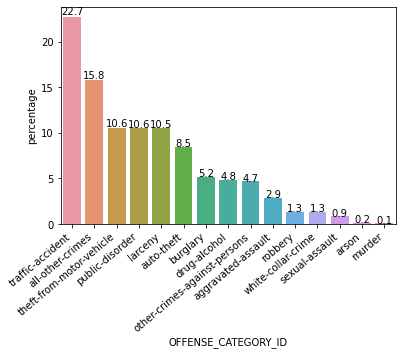

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
import helpers

otypes_plot = sns.barplot(data=offense_types, x=offense_types["OFFENSE_CATEGORY_ID"], y="percentage")
otypes_plot.set_xticklabels(otypes_plot.get_xticklabels(), rotation=40, ha="right")

helpers.show_values(otypes_plot)
plt.show()


In [163]:
neighbourhood_group = crime_df.groupby("DISTRICT_ID", as_index=False)
neighbourhood_occurrence = neighbourhood_group.size()
neighbourhood_occurrence = neighbourhood_occurrence.sort_values(by="size", ascending=False)
neighbourhood_occurrence["percentage"] = neighbourhood_occurrence["size"] / total_records_crime * 100
neighbourhood_occurrence

,DISTRICT_ID,size,percentage
2,3.0,107683,22.897733
5,6.0,95803,20.371567
0,1.0,79837,16.976554
1,2.0,67641,14.383195
3,4.0,60061,12.771382
4,5.0,52754,11.217620
6,7.0,6498,1.381736


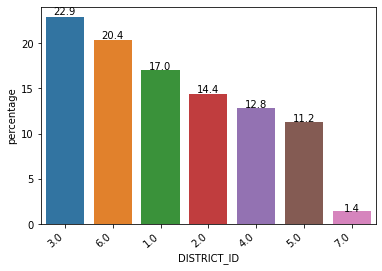

In [172]:
nbh_plot = sns.barplot(data=neighbourhood_occurrence, x="DISTRICT_ID", y="percentage", order=neighbourhood_occurrence.sort_values("size", ascending=False).DISTRICT_ID)
nbh_plot.set_xticklabels(nbh_plot.get_xticklabels(), rotation=40, ha="right")
helpers.show_values(nbh_plot)

plt.show()


## Modelling

### Select modelling techniques

### Generate test design

### Build model

### Assess Model